# Code Implementation for Precision-Recall Tradeoff:

The Popular Heart Diseases dataset from the UCI repository is used to predict whether the patient is suffering from heart illness. You can download Dataset from [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels tensorflow keras --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
# !wget https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv

Importing all libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve

##make sure you have loaded the dataset

Selecting input features, target variable, train test split: 

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

In [ ]:
x = df.drop(['target'],axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =.33, random_state = True)

Training the model and Classification Report:

Logistic Regression is used to fit the model and to get clear information about precision and recall values. Solver changed from ‘lbgfs’ to ‘newton-cg’ to avoid model convergence issues.

In [ ]:
model = LogisticRegression(solver='newton-cg').fit(x_train,y_train)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

Deep dive to precision-recall Tradeoff:

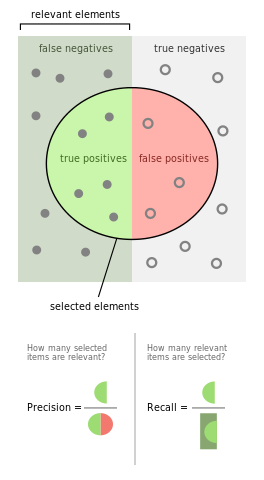

Precision:

The factor which told the exactness of the model. In our example from patients suffering from heart illness, how many are correctly predicted as positive. 


We can say this model has predicted 77% correctly from the actual ground truth from the classification report. 

Recall: 

The factor which told the completeness of the model in other words measure of the model correctly identifying True Positives. 

For our case, the recall for the positive class is 0.81. Recall gives information about how accurately our model is able to identify the relevant data. The recall is also referred to as Sensitivity and True +ve rate. 


Precision-Recall Tradeoff:

For any problem, we mainly have to focus on either of the class or both. In our example, the aim of the model should have high recall means should have a lower number of false negatives. So if we say the model predicted that a person is not having heart illness, then he should not have heart illness.   

If your main focus is to detect a person having heart illness, your model should have high precision, which means you have to lower the False Positive.

Unfortunately, you can’t have both precision and recall high. If you increase precision, it will reduce recall and vice versa. This is called the precision/recall tradeoff.   

Classifier performs differently for different threshold values means positive and negative predication can be changed by setting the threshold value. Scikit does not provide a facility to set the threshold value but gives access to the decision score used in the backend to make predictions. You can find here how to use a decision score to change precision and recall for your model and to find a tradeoff point.

Here we are using a graphical method to detect tradeoffs between precision and recall.

In [ ]:
y_decision_function = model.decision_function(x_test)

In [ ]:
precision,recall,threshold = precision_recall_curve(y_test,y_decision_function)

In [ ]:
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

From the above graph, see the trend; for precision to be 100%, we are getting recall roughly around 40%. You might choose the Tradeoff point where precision is nearly 87% and recall is around 70% from the graph. Again it depends on your problem or your priority which satisfies the needs of the actual problem.  

To read about it more, please refer [this](https://analyticsindiamag.com/python-guide-to-precision-recall-tradeoff/) article.